In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from prettytable import PrettyTable

In [5]:
data = pd.read_excel("hepatitis.xlsx")


In [ ]:

for cot in x:
      names = data[cot]
      plt.hist(names, bins=100, edgecolor='black')
      plt.title('phân bố ' +cot )
      plt.xlabel('' +cot)
      plt.ylabel('Số lượng')
      plt.show()

In [ ]:
imputer = SimpleImputer(missing_values= '?' ,
strategy="most_frequent")
data[['STEROID','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES']]=imputer.fit_transform(data[['STEROID','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES']])


imputer2 = SimpleImputer(missing_values= '?' ,
strategy="most_frequent")
data[['BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME']] = imputer2.fit_transform(data[['BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME']])

data


In [7]:
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
y= data.iloc[:,:1].values.ravel()
x= data.iloc[:,-(data.shape[1]-1):]
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)
print(model.feature_importances_)


x_best =SelectKBest(chi2,k=14).fit_transform(x,y)




[0.05270225 0.02407076 0.03261128 0.00458066 0.01668173 0.06714306
 0.04822917 0.02137551 0.05278513 0.0424493  0.05655353 0.09949572
 0.05284542 0.08935007 0.07221525 0.06429098 0.08369413 0.06216643
 0.05675961]


In [10]:
from sklearn import metrics

In [16]:
#RandomForest
#bằng 1 cách thần kì nào đó n_components=3 là lựa chọn tốt nhất
pipe_lr = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('clf', RandomForestClassifier(n_estimators=100))
])

X_train, X_test, y_train, y_test = train_test_split(x_best, y, test_size=0.2, random_state=42)
pipe_lr.fit(X_train, y_train)
y_pred_RdF=pipe_lr.predict(X_test)
accuracy_RdF = metrics.accuracy_score(y_test, y_pred_RdF)
precision_RdF = metrics.precision_score(y_test, y_pred_RdF)
recall_RdF = metrics.recall_score(y_test, y_pred_RdF)
F1_RdF = metrics.f1_score(y_test, y_pred_RdF)


table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['RandomForest', accuracy_RdF, precision_RdF, recall_RdF, F1_RdF])
print(table)

+--------------+--------------------+--------------------+--------------------+--------------------+
|  Thuật toán  |        Acc         |        Pre         |       Recall       |         F1         |
+--------------+--------------------+--------------------+--------------------+--------------------+
| RandomForest | 0.8064516129032258 | 0.5714285714285714 | 0.5714285714285714 | 0.5714285714285714 |
+--------------+--------------------+--------------------+--------------------+--------------------+


In [17]:
from sklearn.naive_bayes import GaussianNB

In [19]:
#Gaussian_NB
#bằng 1 cách thần kì nào đó n_components=3 là lựa chọn tốt nhất
pipe_lr_NB = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('GNB', GaussianNB())
])

pipe_lr_NB.fit(X_train, y_train)

y_pred_NB=pipe_lr_NB.predict(X_test)
accuracy_NB = metrics.accuracy_score(y_test, y_pred_NB)
precision_NB = metrics.precision_score(y_test, y_pred_NB)
recall_NB = metrics.recall_score(y_test, y_pred_NB)
F1_NB = metrics.f1_score(y_test, y_pred_NB)

table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['Gausian_NB', accuracy_NB, precision_NB, recall_NB, F1_NB])
print(table)


+------------+--------------------+--------------------+---------------------+-------+
| Thuật toán |        Acc         |        Pre         |        Recall       |   F1  |
+------------+--------------------+--------------------+---------------------+-------+
| Gausian_NB | 0.6774193548387096 | 0.3333333333333333 | 0.42857142857142855 | 0.375 |
+------------+--------------------+--------------------+---------------------+-------+


In [20]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#Neural_network
#bằng 1 cách thần kì nào đó n_components=3 là lựa chọn tốt nhất
pipe_lr_NeN = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('NeN', MLPClassifier(solver='lbfgs', alpha=1e-5,
 hidden_layer_sizes=(150,100,50), random_state=1))
])

pipe_lr_NeN.fit(X_train, y_train)

y_pred_NeN=pipe_lr_NeN.predict(X_test)
accuracy_NeN = metrics.accuracy_score(y_test, y_pred_NeN)
precision_NeN = metrics.precision_score(y_test, y_pred_NeN)
recall_NeN = metrics.recall_score(y_test, y_pred_NeN)
F1_NeN = metrics.f1_score(y_test, y_pred_NeN)

table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['Neural_network', accuracy_NeN, precision_NeN, recall_NeN, F1_NeN])
print(table)


+----------------+--------------------+-----+---------------------+-----+
|   Thuật toán   |        Acc         | Pre |        Recall       |  F1 |
+----------------+--------------------+-----+---------------------+-----+
| Neural_network | 0.8064516129032258 | 0.6 | 0.42857142857142855 | 0.5 |
+----------------+--------------------+-----+---------------------+-----+


In [23]:
from keras.layers import Dense
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers.reshaping.flatten import Flatten

In [ ]:
num_classes = 10
# Scale images to the [0, 1] range
x_train2 = X_train.astype("float32") / 255
x_test2 = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)

# convert class vectors to binary class matrices
y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)

In [ ]:

model = Sequential()
model.add(Flatten(input_shape=(14,)))

model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
model.fit(x_train2,y_train2, epochs=25,batch_size=64,verbose=1)

Epoch 1/25
2/2 [==============================] - 1s 15ms/step - loss: 2.2200 - accuracy: 0.7984
Epoch 2/25
2/2 [==============================] - 0s 17ms/step - loss: 2.1237 - accuracy: 0.7984
Epoch 3/25
2/2 [==============================] - 0s 18ms/step - loss: 2.0285 - accuracy: 0.7984
Epoch 4/25
2/2 [==============================] - 0s 21ms/step - loss: 1.9274 - accuracy: 0.7984
Epoch 5/25
2/2 [==============================] - 0s 12ms/step - loss: 1.8208 - accuracy: 0.7984
Epoch 6/25
2/2 [==============================] - 0s 19ms/step - loss: 1.7062 - accuracy: 0.7984
Epoch 7/25
2/2 [==============================] - 0s 11ms/step - loss: 1.5820 - accuracy: 0.7984
Epoch 8/25
2/2 [==============================] - 0s 13ms/step - loss: 1.4505 - accuracy: 0.7984
Epoch 9/25
2/2 [==============================] - 0s 13ms/step - loss: 1.3185 - accuracy: 0.7984
Epoch 10/25
2/2 [==============================] - 0s 18ms/step - loss: 1.1867 - accuracy: 0.7984
Epoch 11/25
2/2 [============

In [21]:
from sklearn.linear_model import LogisticRegression 

In [24]:
#Hồi quy logistic
pipe_lr_LG = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('LG',LogisticRegression(random_state = 0) )
])


pipe_lr_LG.fit(X_train, y_train)

y_pred_LG=pipe_lr_LG.predict(X_test)
accuracy_LG = metrics.accuracy_score(y_test, y_pred_LG)
precision_LG = metrics.precision_score(y_test, y_pred_LG)
recall_LG = metrics.recall_score(y_test, y_pred_LG)
F1_LG = metrics.f1_score(y_test, y_pred_LG)
#
table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['Logistuc', accuracy_LG, precision_LG, recall_LG, F1_LG])
print(table)

+------------+--------------------+-----+--------------------+--------------------+
| Thuật toán |        Acc         | Pre |       Recall       |         F1         |
+------------+--------------------+-----+--------------------+--------------------+
|  Logistuc  | 0.7419354838709677 | 0.4 | 0.2857142857142857 | 0.3333333333333333 |
+------------+--------------------+-----+--------------------+--------------------+


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#kNN
pipe_lr_kNN = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('kNN',KNeighborsClassifier(n_neighbors=5,weights='uniform'))
])

pipe_lr_kNN.fit(X_train, y_train)

y_pred_kNN=pipe_lr_kNN.predict(X_test)
accuracy_kNN = metrics.accuracy_score(y_test, y_pred_kNN)
precision_kNN = metrics.precision_score(y_test, y_pred_kNN)
recall_kNN = metrics.recall_score(y_test, y_pred_kNN)
F1_kNN = metrics.f1_score(y_test, y_pred_kNN)

table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['kNN', accuracy_kNN, precision_kNN, recall_kNN, F1_kNN])
print(table)

+------------+--------------------+--------------------+--------------------+--------------------+
| Thuật toán |        Acc         |        Pre         |       Recall       |         F1         |
+------------+--------------------+--------------------+--------------------+--------------------+
|    kNN     | 0.8064516129032258 | 0.5714285714285714 | 0.5714285714285714 | 0.5714285714285714 |
+------------+--------------------+--------------------+--------------------+--------------------+


In [ ]:
from sklearn import svm
from sklearn.svm import SVC



In [ ]:
#SVM
#linear
pipe_lr_SVM1 = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('SVM',svm.SVC(kernel='linear'))
])
pipe_lr_SVM1.fit(X_train, y_train)
y_pred_SVM1=pipe_lr_SVM1.predict(X_test)
accuracy_SVM1 = metrics.accuracy_score(y_test, y_pred_SVM1)
precision_SVM1 = metrics.precision_score(y_test, y_pred_SVM1)
recall_SVM1= metrics.recall_score(y_test, y_pred_SVM1)
F1_SVM1 = metrics.f1_score(y_test, y_pred_SVM1)


#sigmoid
pipe_lr_SVM2 = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('SVM',svm.SVC(kernel='sigmoid'))
])
pipe_lr_SVM2.fit(X_train, y_train)

y_pred_SVM2=pipe_lr_SVM2.predict(X_test)
accuracy_SVM2 = metrics.accuracy_score(y_test, y_pred_SVM2)
precision_SVM2 = metrics.precision_score(y_test, y_pred_SVM2)
recall_SVM2= metrics.recall_score(y_test, y_pred_SVM2)
F1_SVM2 = metrics.f1_score(y_test, y_pred_SVM2)

#rbf
pipe_lr_SVM3 = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('SVM',svm.SVC(kernel='rbf'))
])
pipe_lr_SVM3.fit(X_train, y_train)

y_pred_SVM3=pipe_lr_SVM3.predict(X_test)
accuracy_SVM3 = metrics.accuracy_score(y_test, y_pred_SVM3)
precision_SVM3 = metrics.precision_score(y_test, y_pred_SVM3)
recall_SVM3= metrics.recall_score(y_test, y_pred_SVM3)
F1_SVM3 = metrics.f1_score(y_test, y_pred_SVM3)
#
table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['SVM_linear', accuracy_SVM1, precision_SVM1, recall_SVM1, F1_SVM1])
table.add_row(['SVM_sigmoid', accuracy_SVM2, precision_SVM2, recall_SVM2, F1_SVM2])
table.add_row(['SVM_rbf', accuracy_SVM3, precision_SVM3, recall_SVM3, F1_SVM3])
print(table)

+-------------+--------------------+--------------------+---------------------+--------------------+
|  Thuật toán |        Acc         |        Pre         |        Recall       |         F1         |
+-------------+--------------------+--------------------+---------------------+--------------------+
|  SVM_linear | 0.7419354838709677 |        0.4         |  0.2857142857142857 | 0.3333333333333333 |
| SVM_sigmoid | 0.6774193548387096 | 0.3333333333333333 | 0.42857142857142855 |       0.375        |
|   SVM_rbf   | 0.8064516129032258 |        0.6         | 0.42857142857142855 |        0.5         |
+-------------+--------------------+--------------------+---------------------+--------------------+


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#DecisionTreeClassifier
pipe_lr_DTC = Pipeline([('scl', StandardScaler()),
('pca', PCA(n_components=3)),('DTC',DecisionTreeClassifier(criterion="entropy", random_state=42,
max_depth=3, min_samples_leaf=5))
])

pipe_lr_DTC.fit(X_train, y_train)

y_pred_DTC=pipe_lr_DTC.predict(X_test)
accuracy_DTC = metrics.accuracy_score(y_test, y_pred_DTC)
precision_DTC = metrics.precision_score(y_test, y_pred_DTC)
recall_DTC = metrics.recall_score(y_test, y_pred_DTC)
F1_DTC = metrics.f1_score(y_test, y_pred_DTC)

table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['DTC', accuracy_DTC, precision_DTC, recall_DTC, F1_DTC])
print(table)

+------------+--------------------+--------------------+--------------------+--------------------+
| Thuật toán |        Acc         |        Pre         |       Recall       |         F1         |
+------------+--------------------+--------------------+--------------------+--------------------+
|    DTC     | 0.7096774193548387 | 0.4166666666666667 | 0.7142857142857143 | 0.5263157894736842 |
+------------+--------------------+--------------------+--------------------+--------------------+


In [ ]:
#Vẽ bảng so sánh

table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['RandomForest', accuracy_RdF, precision_RdF, recall_RdF, F1_RdF])
table.add_row(['Gausian', accuracy_NB, precision_NB, recall_NB, F1_NB])
table.add_row(['Neural_network', accuracy_NeN, precision_NeN, recall_NeN, F1_NeN])
table.add_row(['DecisionTreeClassifierc', accuracy_DTC, precision_DTC, recall_DTC, F1_DTC])
table.add_row(['SVM_rbf', accuracy_SVM3, precision_SVM3, recall_SVM3, F1_SVM3])
table.add_row(['kNN', accuracy_kNN, precision_kNN, recall_kNN, F1_kNN])
print(table)

+-------------------------+--------------------+--------------------+---------------------+--------------------+
|        Thuật toán       |        Acc         |        Pre         |        Recall       |         F1         |
+-------------------------+--------------------+--------------------+---------------------+--------------------+
|       RandomForest      | 0.8064516129032258 | 0.5714285714285714 |  0.5714285714285714 | 0.5714285714285714 |
|         Gausian         | 0.7741935483870968 |        0.5         | 0.42857142857142855 | 0.4615384615384615 |
|      Neural_network     | 0.8064516129032258 |        0.6         | 0.42857142857142855 |        0.5         |
| DecisionTreeClassifierc | 0.7096774193548387 | 0.4166666666666667 |  0.7142857142857143 | 0.5263157894736842 |
|         SVM_rbf         | 0.8064516129032258 |        0.6         | 0.42857142857142855 |        0.5         |
|           kNN           | 0.8064516129032258 | 0.5714285714285714 |  0.5714285714285714 | 0.57

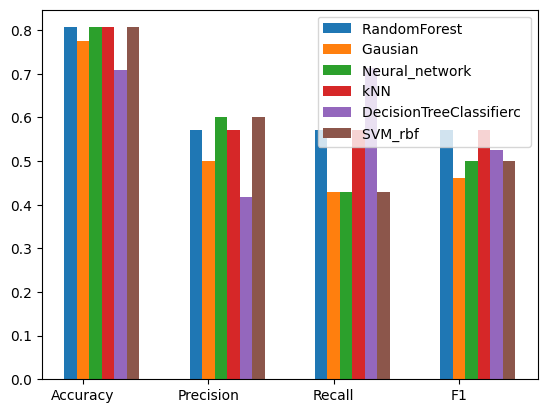

In [ ]:
# Tạo tên cho các cột
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(labels))

# Tạo dữ liệu cho các cột
RdF=(accuracy_RdF,precision_RdF,recall_RdF,F1_RdF)
NB=(accuracy_NB,precision_NB,recall_NB,F1_NB)
NeN=(accuracy_NeN,precision_NeN,recall_NeN,F1_NeN)
#LG=(accuracy_LG,precision_LG,recall_LG,F1_LG)
kNN=(accuracy_kNN,precision_kNN,recall_kNN,F1_kNN)
DTC=(accuracy_DTC,precision_DTC,recall_DTC,F1_DTC)
SVM_rbf=(accuracy_SVM3,precision_SVM3,recall_SVM3,F1_SVM3)

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.1, RdF, 0.1, label='RandomForest ')
rects2 = ax.bar(x, NB, 0.1, label='Gausian ')
rects3 = ax.bar(x +0.1, NeN, 0.1, label='Neural_network ')
rects4 = ax.bar(x+ 0.2, kNN, 0.1, label='kNN ')
rects5 = ax.bar(x+ 0.3, DTC, 0.1, label='DecisionTreeClassifierc ')
rects6 = ax.bar(x+ 0.4, SVM_rbf, 0.1, label='SVM_rbf ')


ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()




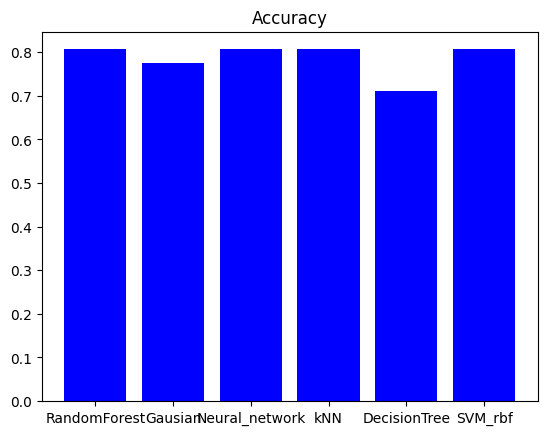

In [ ]:
x = ['RandomForest', 'Gausian', 'Neural_network', 'kNN','DecisionTree','SVM_rbf']
Acc=[accuracy_RdF,accuracy_NB,accuracy_NeN,accuracy_kNN,accuracy_DTC,accuracy_SVM3]
pre =[precision_RdF,precision_NB,precision_NeN,precision_kNN,precision_DTC,precision_SVM3]
recall =[recall_RdF,recall_NB,recall_NeN,recall_kNN,recall_DTC,recall_SVM3]
f1=[F1_RdF,F1_NB,F1_NeN,F1_kNN,F1_DTC,F1_SVM3]
plt.bar(x, Acc, color='blue')
plt.title('Accuracy')



plt.show()

Text(0.5, 1.0, 'Precision')

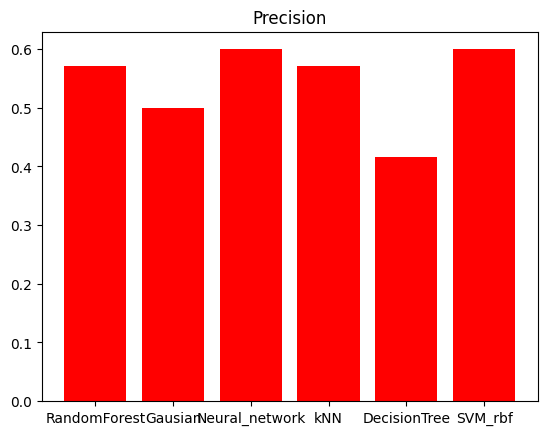

In [ ]:
plt.bar(x, pre, color='red')
plt.title('Precision')

Text(0.5, 1.0, 'Recall')

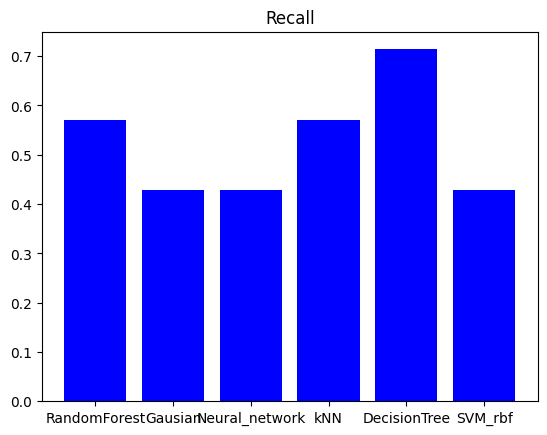

In [ ]:
plt.bar(x, recall, color='blue')
plt.title('Recall')

Text(0.5, 1.0, 'F1')

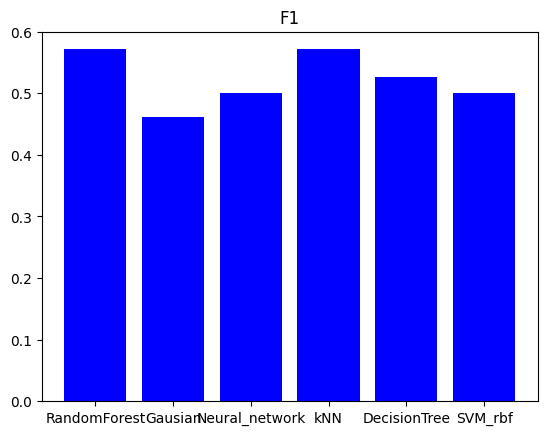

In [ ]:
plt.bar(x, f1, color='blue')
plt.title('F1')